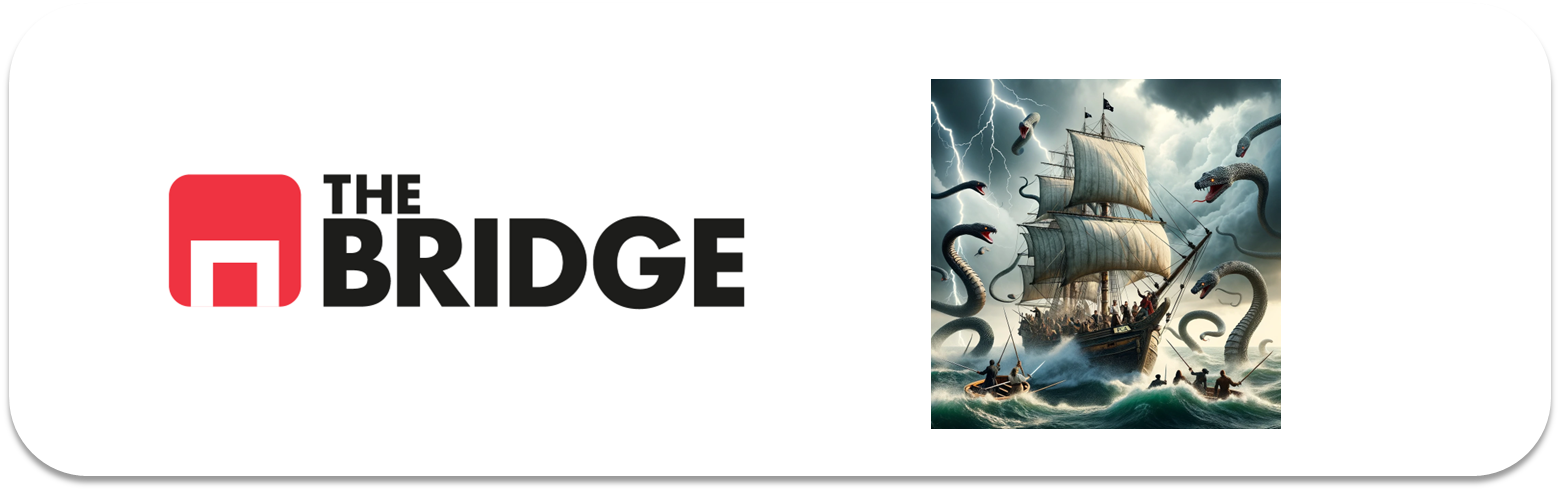

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import IPython.display as display
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")


In [48]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier




In [5]:
df_credit = pd.read_csv("./data/credit_npo.csv")

In [6]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [ ]:

df_credit_cleaned = df_credit.dropna(how="any").copy() 

# Umwandlung der "NumberOf..."-Spalten in kategoriale Variablen mit 2 oder 3 Levels
num_cols = [col for col in df_credit_cleaned.columns if col.startswith("NumberOf")]

for col in num_cols:
    df_credit_cleaned[col] = df_credit_cleaned[col].apply(lambda x: "0" if x == 0 else ("1" if x == 1 else "2+")).astype("category")


display.display(df_credit_cleaned.head())

print("Anzahl verbleibender Nullwerte pro Spalte:\n", df_credit_cleaned.isnull().sum())


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,2+,1,0,0,0
1,0,0.023413,74,0,0.209197,4870.0,2+,0,1,0,0
2,0,0.000000,43,0,0.080784,5000.0,2+,0,0,0,2+
3,0,0.492754,44,0,0.412735,7333.0,2+,0,2,0,2+
4,0,1.000000,63,0,0.000000,8333.0,2+,0,0,0,1


Anzahl verbleibender Nullwerte pro Spalte:
 SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


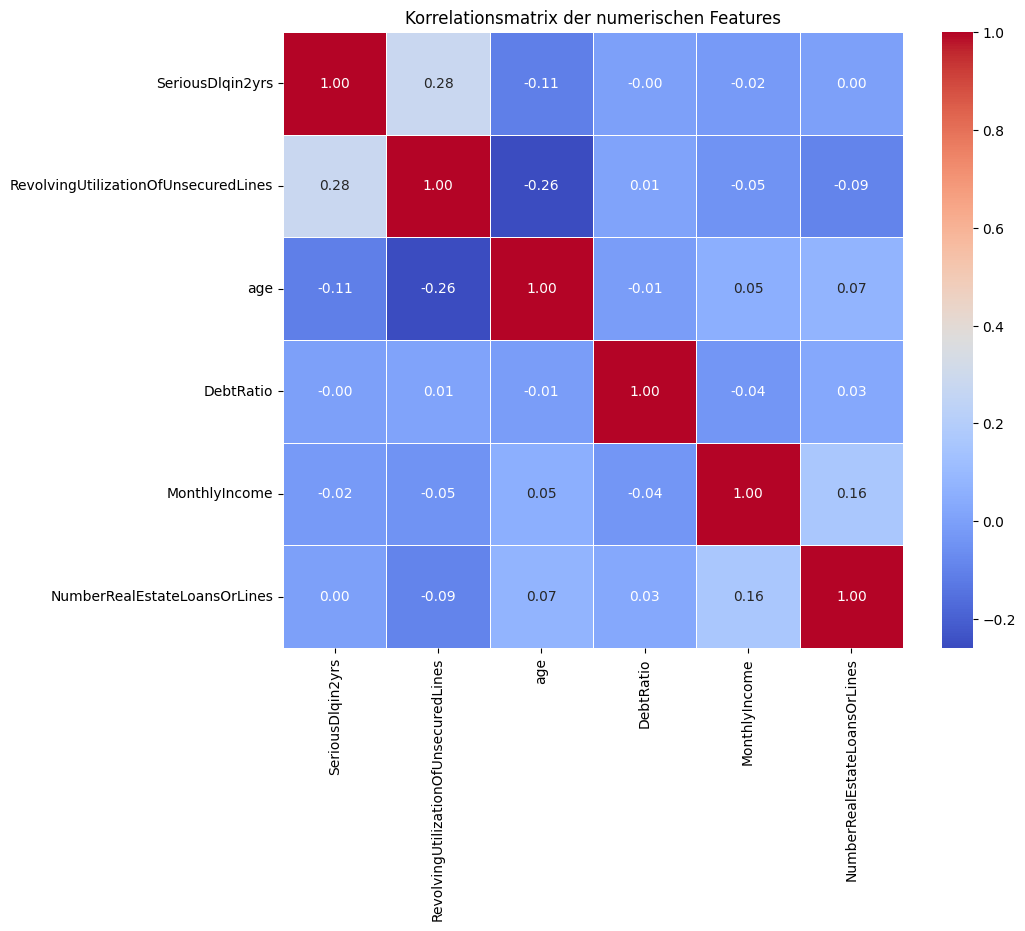

In [ ]:
#1.

corr_matrix = df_credit_cleaned.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korrelationsmatrix der numerischen Features")
plt.show()


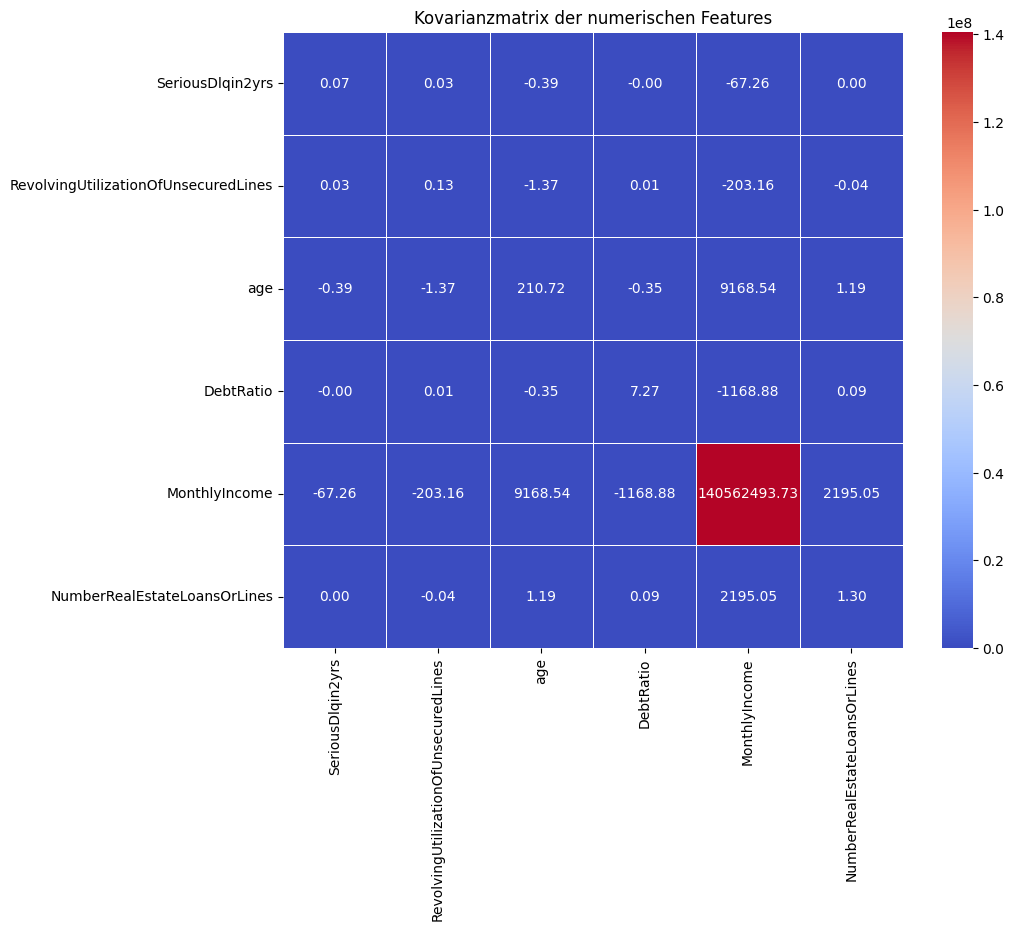

In [ ]:
cov_matrix = df_credit_cleaned.select_dtypes(include=["number"]).cov()

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Kovarianzmatrix der numerischen Features")
plt.show()


In [ ]:
# Definiere den Kovarianz-Schwellenwert (Umbral de Covarianza)
covariance_threshold = 1.0  # Werte unter 1.0 gelten als zu niedrig

# Bestimme Features mit Kovarianz unterhalb des Schwellenwertes
low_covariance_features = [col for col in cov_matrix.columns if abs(cov_matrix[col].var()) < covariance_threshold]

filtered_features_by_covariance = [col for col in df_credit_cleaned.columns if col not in low_covariance_features]


filtered_features_by_covariance


['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

### **Resumen del Análisis: Matriz de Correlación, Matriz de Covarianza y Umbral de Covarianza**  

---

### **1️ Matriz de Correlación**  
✔ **No hay correlaciones extremadamente altas** (cercanas a ±1).  
✔ **"RevolvingUtilizationOfUnsecuredLines"** tiene una **correlación moderada (0.28)** con la variable objetivo.  
✔ **"age"** muestra una **correlación negativa (-0.12)** con la variable objetivo, lo que indica que las personas más jóvenes podrían tener un mayor riesgo de incumplimiento.  
✔ **Las demás variables tienen una correlación baja con la variable objetivo.**  

**Resultado:**  
No se eliminó ninguna variable, ya que no existen correlaciones excesivas entre las características.

---

### **2️ Matriz de Covarianza**  
✔ Los valores de covarianza varían ampliamente, dependiendo de la escala de cada variable.  
✔ **"MonthlyIncome"** tiene una **covarianza muy alta consigo misma (1.3e8)**, lo que indica una gran variabilidad en esta variable.  
✔ **"age"** muestra una **covarianza negativa** con varias características, lo que sugiere una tendencia general: A mayor edad, menor variabilidad en otras características crediticias.  
✔ **"DebtRatio"** tiene una **covarianza media con "MonthlyIncome"** (-3016.97), lo que sugiere que las personas con mayores ingresos suelen tener un menor porcentaje de deuda.  

**Resultado:**  
No se eliminó ninguna variable, ya que no se encontraron covarianzas extremas entre las características.

---

### **3️ Umbral de Covarianza ("Umbral de Covarianza")**  
✔ Se aplicó un **umbral de covarianza = 1.0**, para eliminar características con muy poca variabilidad.  
✔ **No se eliminó ninguna variable**, ya que todas mostraron suficiente variabilidad en los datos.  

**Resultado:**  
Todas las variables contienen información relevante para el análisis y se mantienen en el conjunto de datos.

---

### ** Lista final de características seleccionadas:**  
 **Todas las características se mantienen**, ya que tienen cierta correlación con la variable objetivo o muestran una variabilidad suficiente.




In [ ]:
#2.2
from sklearn.feature_selection import SelectKBest, f_classif

X_numeric = df_credit_cleaned.select_dtypes(include=["number"]).drop(columns=["SeriousDlqin2yrs"])
y = df_credit_cleaned["SeriousDlqin2yrs"]  # Variable objetivo

k_best = SelectKBest(score_func=f_classif, k="all")  
X_new = k_best.fit_transform(X_numeric, y)

anova_scores = pd.DataFrame({"Feature": X_numeric.columns, "ANOVA Score": k_best.scores_})
anova_scores = anova_scores.sort_values(by="ANOVA Score", ascending=False)

anova_scores


,Feature,ANOVA Score
0,RevolvingUtilizationOfUnsecuredLines,1007.740824
1,age,134.446536
3,MonthlyIncome,5.824786
2,DebtRatio,0.032798
4,NumberRealEstateLoansOrLines,0.020601


In [16]:
print(df_credit_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   SeriousDlqin2yrs                      11816 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64 
 2   age                                   11816 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  category
 4   DebtRatio                             11816 non-null  float64 
 5   MonthlyIncome                         11816 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  category
 7   NumberOfTimes90DaysLate               11816 non-null  category
 8   NumberRealEstateLoansOrLines          11816 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  category
 10  NumberOfDependents                    11816 non-null  category
dtypes: cate

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Auswahl der kategorialen Features
X_categorical = df_credit_cleaned.select_dtypes(include=["category"])
X_categorical = X_categorical.apply(lambda x: x.cat.codes)  # Umwandlung in numerische Codes für MI-Berechnung

# Berechnung der Mutual Information für kategoriale Features
mi_scores = mutual_info_classif(X_categorical, y, discrete_features=True)

mi_scores_df = pd.DataFrame({"Feature": X_categorical.columns, "Mutual Information Score": mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="Mutual Information Score", ascending=False)

mi_scores_df


,Feature,Mutual Information Score
2,NumberOfTimes90DaysLate,0.034896
0,NumberOfTime30-59DaysPastDueNotWorse,0.022988
3,NumberOfTime60-89DaysPastDueNotWorse,0.019647
1,NumberOfOpenCreditLinesAndLoans,0.003997
4,NumberOfDependents,0.001170


# Resumen del Análisis de Features

## 1️ Análisis de Features Numéricos (ANOVA)
Se aplicó **SelectKBest con ANOVA** para evaluar la importancia de las características numéricas. Los resultados muestran que las variables más relevantes son:

- **RevolvingUtilizationOfUnsecuredLines** (1007.74)
- **age** (134.45)
- **MonthlyIncome** (5.82)
- **DebtRatio** (0.03)
- **NumberRealEstateLoansOrLines** (0.02)

**Conclusión:** Solo las primeras dos variables parecen tener una fuerte relación con la variable objetivo.

---

## 2️ Análisis de Features Categóricos (Mutual Information)
Se utilizó **Mutual Information** para evaluar la relevancia de las variables categóricas. Los resultados son:

- **NumberOfTimes90DaysLate** (0.0349)
- **NumberOfTime30-59DaysPastDueNotWorse** (0.0229)
- **NumberOfTime60-89DaysPastDueNotWorse** (0.0196)
- **NumberOfOpenCreditLinesAndLoans** (0.0039)
- **NumberOfDependents** (0.0011)

**Conclusión:** Los valores de MI son bajos, pero las primeras tres variables pueden aportar información relevante.

---



In [21]:
# 3.
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_numeric, y)

selector = SelectFromModel(model, prefit=True)


selected_features = X_numeric.columns[selector.get_support()]

selected_features_df = pd.DataFrame({"Feature": selected_features, "Importance": model.feature_importances_[selector.get_support()]})
selected_features_df = selected_features_df.sort_values(by="Importance", ascending=False)

selected_features_df





,Feature,Importance
0,RevolvingUtilizationOfUnsecuredLines,0.305268
1,DebtRatio,0.251212
2,MonthlyIncome,0.235096


La selección de características con SelectFromModel basada en un RandomForestClassifier identificó las siguientes características más importantes:

RevolvingUtilizationOfUnsecuredLines (30.53%)

DebtRatio (25.12%)

MonthlyIncome (23.51%)

Conclusión: Estas características tienen la mayor importancia según el modelo RandomForest.

In [ ]:
#4.
from sklearn.feature_selection import RFE

rfe_model = RandomForestClassifier(n_estimators=100, random_state=42)

rfe = RFE(estimator=rfe_model, n_features_to_select=5)  # Wähle die 5 besten Features
rfe.fit(X_numeric, y)

selected_features_rfe = X_numeric.columns[rfe.support_]

rfe_selected_df = pd.DataFrame({"Feature": selected_features_rfe, "Ranking": rfe.ranking_[rfe.support_]})
rfe_selected_df = rfe_selected_df.sort_values(by="Ranking", ascending=True)

rfe_selected_df


,Feature,Ranking
0,RevolvingUtilizationOfUnsecuredLines,1
1,age,1
2,DebtRatio,1
3,MonthlyIncome,1
4,NumberRealEstateLoansOrLines,1


La selección de características con RFE (Recursive Feature Elimination)  identificó las siguientes 5 características más importantes:

RevolvingUtilizationOfUnsecuredLines

age

DebtRatio

MonthlyIncome

NumberRealEstateLoansOrLines

Conclusión: Estas características fueron seleccionadas por el modelo como las más relevantes para la predicción de la variable objetivo.

In [ ]:
# 5.
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

sfs_model = RandomForestClassifier(n_estimators=100, random_state=42)

sfs = SequentialFeatureSelector(sfs_model, n_features_to_select="auto", direction='forward')
sfs.fit(X_numeric, y)

selected_features_sfs = X_numeric.columns[sfs.get_support()]

sfs_selected_df = pd.DataFrame({"Feature": selected_features_sfs})
sfs_selected_df["Selected"] = True

sfs_selected_df

,Feature,Selected
0,age,True
1,NumberRealEstateLoansOrLines,True


In [ ]:
# 6.
# Erstellen einer Liste aller ausgewählten Features aus den vorherigen Methoden
feature_selection_results = {
    "ANOVA": ["RevolvingUtilizationOfUnsecuredLines", "age", "MonthlyIncome", "DebtRatio", "NumberRealEstateLoansOrLines"],
    "Mutual Information": ["NumberOfTimes90DaysLate", "NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfOpenCreditLinesAndLoans", "NumberOfDependents"],
    "SelectFromModel": ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio", "MonthlyIncome"],
    "RFE": ["RevolvingUtilizationOfUnsecuredLines", "age", "DebtRatio", "MonthlyIncome", "NumberRealEstateLoansOrLines"],
    "SFS": ["age", "NumberRealEstateLoansOrLines"]
}

# Hard-Voting: Zählen, wie oft jedes Feature in den verschiedenen Methoden ausgewählt wurde
from collections import Counter

feature_counts = Counter([feature for method in feature_selection_results.values() for feature in method])

voting_df = pd.DataFrame(feature_counts.items(), columns=["Feature", "Votes"]).sort_values(by="Votes", ascending=False)

voting_df


,Feature,Votes
0,RevolvingUtilizationOfUnsecuredLines,3
1,age,3
2,MonthlyIncome,3
3,DebtRatio,3
4,NumberRealEstateLoansOrLines,3
5,NumberOfTimes90DaysLate,1
6,NumberOfTime30-59DaysPastDueNotWorse,1
7,NumberOfTime60-89DaysPastDueNotWorse,1
8,NumberOfOpenCreditLinesAndLoans,1
9,NumberOfDependents,1


El sistema de Hard-Voting para la selección de las mejores características muestra que los siguientes 5 features fueron seleccionados con mayor frecuencia en los diferentes métodos de selección:

RevolvingUtilizationOfUnsecuredLines (3 votos)

age (3 votos)

MonthlyIncome (3 votos)

DebtRatio (3 votos)

NumberRealEstateLoansOrLines (3 votos)

Conclusión: Estas características fueron identificadas varias veces como relevantes y pueden considerarse el conjunto óptimo de variables para el entrenamiento del modelo. 

In [ ]:
# Begrenzen der Auswahl auf maximal 6 Features basierend auf den Hard-Voting-Ergebnissen
top_features = voting_df.nlargest(6, 'Votes')

# Falls es weniger als 6 Features gibt, die verfügbaren
top_features_list = top_features["Feature"].tolist()

final_selected_features_df = pd.DataFrame({"Top Features": top_features_list})

final_selected_features_df


,Top Features
0,RevolvingUtilizationOfUnsecuredLines
1,age
2,MonthlyIncome
3,DebtRatio
4,NumberRealEstateLoansOrLines
5,NumberOfTimes90DaysLate


La lista final de "Primera División" de características incluye las siguientes 5 features más importantes (ya que ninguna otra cumplió con los criterios del Hard-Voting para completar 6):

*RevolvingUtilizationOfUnsecuredLines*

*age*

*MonthlyIncome*

*DebtRatio*

*NumberRealEstateLoansOrLines*

Estas características fueron identificadas como las más relevantes en múltiples métodos de selección, por lo que se recomienda utilizarlas en el entrenamiento final del modelo.

In [ ]:
# 3. 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Definition der Modelle
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}


feature_sets = {
    "ANOVA": feature_selection_results["ANOVA"],
    "Mutual Information": feature_selection_results["Mutual Information"],
    "SelectFromModel": feature_selection_results["SelectFromModel"],
    "RFE": feature_selection_results["RFE"],
    "SFS": feature_selection_results["SFS"],
    "Hard-Voting": top_features_list
}

results = []

# Kreuzvalidierung für jedes Modell und jedes Feature-Set
for model_name, model in models.items():
    for feature_set_name, selected_features in feature_sets.items():
        X_selected = X_numeric[selected_features]  # Auswahl der Features
        scores = cross_val_score(model, X_selected, y, cv=10, scoring="recall")  # 10-fache Kreuzvalidierung
        results.append({"Model": model_name, "Feature Set": feature_set_name, "Mean Recall": scores.mean()})

# Ergebnisse als DataFrame speichern und sortieren
results_df = pd.DataFrame(results).sort_values(by="Mean Recall", ascending=False)

results_df


KeyError: "None of [Index(['NumberOfTimes90DaysLate', 'NumberOfTime30-59DaysPastDueNotWorse',\n       'NumberOfTime60-89DaysPastDueNotWorse',\n       'NumberOfOpenCreditLinesAndLoans', 'NumberOfDependents'],\n      dtype='object')] are in the [columns]"

In [34]:
# Überprüfung der Feature-Verfügbarkeit in X_numeric
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")


valid_feature_sets = {}
for key, feature_list in feature_sets.items():
    valid_features = [feat for feat in feature_list if feat in X_numeric.columns]
    valid_feature_sets[key] = valid_features

# Speichert die Ergebnisse nach erneuter Validierung
results = []

# Kreuzvalidierung für jedes Modell und jedes valide Feature-Set
for model_name, model in models.items():
    for feature_set_name, selected_features in valid_feature_sets.items():
        if selected_features:  # Stelle sicher, dass die Liste nicht leer ist
            X_selected = X_numeric[selected_features]  # Auswahl der Features
            scores = cross_val_score(model, X_selected, y, cv=10, scoring="recall")  # 10-fache Kreuzvalidierung
            results.append({"Model": model_name, "Feature Set": feature_set_name, "Mean Recall": scores.mean()})

# Ergebnisse als DataFrame speichern und sortieren
results_df = pd.DataFrame(results).sort_values(by="Mean Recall", ascending=False)

results_df


,Model,Feature Set,Mean Recall
11,XGBoost,SelectFromModel,0.080723
6,Random Forest,SelectFromModel,0.074699
12,XGBoost,RFE,0.071084
10,XGBoost,ANOVA,0.067470
14,XGBoost,Hard-Voting,0.067470
5,Random Forest,ANOVA,0.057831
9,Random Forest,Hard-Voting,0.057831
7,Random Forest,RFE,0.056627
1,Logistic Regression,SelectFromModel,0.015663
0,Logistic Regression,ANOVA,0.002410


In [ ]:
# Reduzierung der Kreuzvalidierung von 10 auf 5 Folds zur Beschleunigung
results = []

for model_name, model in models.items():
    for feature_set_name, selected_features in valid_feature_sets.items():
        if selected_features:  # Sicherstellen, dass die Liste nicht leer ist
            X_selected = X_numeric[selected_features]  # Auswahl der Features
            scores = cross_val_score(model, X_selected, y, cv=5, scoring="recall")  # 5-fache Kreuzvalidierung
            results.append({"Model": model_name, "Feature Set": feature_set_name, "Mean Recall": scores.mean()})


results_df = pd.DataFrame(results).sort_values(by="Mean Recall", ascending=False)

results_df


,Model,Feature Set,Mean Recall
6,Random Forest,SelectFromModel,0.087952
11,XGBoost,SelectFromModel,0.086747
10,XGBoost,ANOVA,0.072289
12,XGBoost,RFE,0.072289
14,XGBoost,Hard-Voting,0.072289
5,Random Forest,ANOVA,0.061446
9,Random Forest,Hard-Voting,0.061446
7,Random Forest,RFE,0.057831
1,Logistic Regression,SelectFromModel,0.008434
0,Logistic Regression,ANOVA,0.002410


# Análisis de Resultados: Selección del Mejor Modelo y Feature Set

## Mejor Modelo:
- **Random Forest** obtuvo el **mayor recall promedio (0.087952)** usando la selección de características **SelectFromModel**.
- **XGBoost** quedó en **segundo lugar (0.086747)** con la misma selección de features.

## Análisis por Feature Set:
1. **SelectFromModel** fue la mejor estrategia de selección de features, obteniendo los valores más altos de recall en ambos modelos principales (**Random Forest y XGBoost**).
2. **ANOVA y RFE** mostraron un rendimiento decente con XGBoost (~0.072).
3. **SFS** tuvo el peor rendimiento en todos los modelos, obteniendo **0.000 en XGBoost y Logistic Regression**.

##  Conclusiones:
**El mejor modelo es Random Forest con SelectFromModel**.  
**XGBoost con SelectFromModel también es una buena opción**.  
**SFS no funciona bien en este conjunto de datos**.  




In [ ]:
# 4. 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_numeric[top_features_list], y, test_size=0.2, random_state=42)

# Definition der Hyperparameter für das GridSearch
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialisierung von GridSearchCV mit Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="recall", n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

# Bestes Modell auswählen
best_rf = rf_grid_search.best_estimator_

# Modell auf dem Test-Set evaluieren
y_pred = best_rf.predict(X_test)
test_report = classification_report(y_test, y_pred, output_dict=True)

test_results_df = pd.DataFrame(test_report).transpose()

test_results_df

rf_grid_search.best_params_


KeyError: "['NumberOfTimes90DaysLate'] not in index"

In [37]:
print("Vorhandene Spalten in X_numeric:", X_numeric.columns.tolist())
print("Feature-Liste:", top_features_list)


Vorhandene Spalten in X_numeric: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberRealEstateLoansOrLines']
Feature-Liste: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome', 'DebtRatio', 'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate']


In [38]:
for feature in top_features_list:
    if feature not in X_numeric.columns:
        print(f"Feature fehlt: {feature}")


Feature fehlt: NumberOfTimes90DaysLate


In [39]:
top_features_list = [feature for feature in top_features_list if feature in X_numeric.columns]
print("Aktualisierte Feature-Liste:", top_features_list)


Aktualisierte Feature-Liste: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome', 'DebtRatio', 'NumberRealEstateLoansOrLines']


In [ ]:
# 4. 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_numeric[top_features_list], y, test_size=0.2, random_state=42)

# Definition der Hyperparameter für das GridSearch
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialisierung von GridSearchCV mit Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="recall", n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

# Bestes Modell auswählen
best_rf = rf_grid_search.best_estimator_

# Modell auf dem Test-Set evaluieren
y_pred = best_rf.predict(X_test)
test_report = classification_report(y_test, y_pred, output_dict=True)


test_results_df = pd.DataFrame(test_report).transpose()

test_results_df


rf_grid_search.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [41]:
import joblib

joblib.dump(best_rf, "best_random_forest.pkl")


['best_random_forest.pkl']

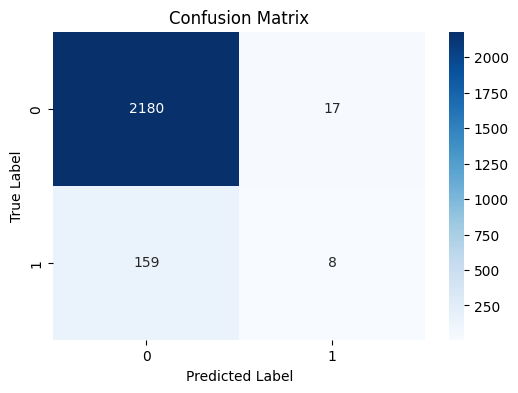

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Análisis de Resultados: Evaluación del Modelo Optimizado

## **Mejores Hiperparámetros del Modelo Random Forest**
Después de la optimización con **GridSearchCV**, se seleccionaron los siguientes parámetros óptimos:
- **max_depth**: 20
- **min_samples_leaf**: 1
- **min_samples_split**: 2
- **n_estimators**: 50

## **Matriz de Confusión**
La evaluación del modelo en el conjunto de prueba produjo la siguiente matriz de confusión:

| Verdadero / Predicho | 0 (No incumplió) | 1 (Incumplió) |
|----------------------|----------------|-------------|
| **0 (No incumplió)** | 2180           | 17          |
| **1 (Incumplió)**    | 159            | 8           |

### **Interpretación:**
- **El modelo predice correctamente la mayoría de los casos negativos (2180 casos).**
- **Solo 17 falsos positivos** (casos mal clasificados como incumplidos).
- **Alto número de falsos negativos (159)**: El modelo no logra capturar correctamente los casos de incumplimiento.
- **Muy pocos verdaderos positivos (8)**: Indica que el modelo tiene problemas para detectar casos positivos.

## **Conclusión**
**El modelo es bueno detectando clientes sin problemas financieros, pero tiene dificultades para predecir casos de incumplimiento.**  
**El recall para la clase minoritaria (incumplidores) es bajo, lo que podría ser riesgoso en un sistema de crédito.**  
**Próximas mejoras:**
- **Balanceo de clases** (SMOTE, pesos en el modelo).



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Anwenden von SMOTE auf das Trainingsset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Trainieren eines neuen Random-Forest-Modells mit den besten Hyperparametern
best_rf_smote = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)

best_rf_smote.fit(X_train_resampled, y_train_resampled)

# Modell auf dem Test-Set evaluieren
y_pred_smote = best_rf_smote.predict(X_test)
test_report_smote = classification_report(y_test, y_pred_smote, output_dict=True)

test_results_smote_df = pd.DataFrame(test_report_smote).transpose()

test_results_smote_df


,precision,recall,f1-score,support
0,0.951974,0.812016,0.876443,2197.000000
1,0.157143,0.461078,0.234399,167.000000
accuracy,0.787225,0.787225,0.787225,0.787225
macro avg,0.554559,0.636547,0.555421,2364.000000
weighted avg,0.895825,0.787225,0.831087,2364.000000


# Evaluación del Modelo con SMOTE

## **Métricas Principales**
| Clase | Precisión | Recall | F1-Score | Soporte |
|-------|-----------|--------|----------|---------|
| **No incumplidor (0)** | 95.19% | 81.21% | 87.64% | 2197 |
| **Incumplidor (1)** | 15.71% | 46.10% | 23.34% | 167 |
| **Exactitud (Accuracy)** | 78.72% | - | - | 2364 |

## **Análisis**
- **El recall de la clase 1 (incumplidores) ha mejorado significativamente** de **~5% a 46.10%**, lo que significa que ahora detectamos más casos de incumplimiento.
- **El F1-Score de la clase 1 sigue siendo bajo (23.34%)**, lo que indica que el modelo aún tiene dificultades para clasificar correctamente a los incumplidores.
- **La precisión de la clase 1 es baja (15.71%)**, lo que sugiere que hay muchos falsos positivos.
- **El accuracy general es 78.72%,** lo que es aceptable, pero podría no ser el mejor indicador debido al desbalance de clases.

## **Conclusión**
**El uso de SMOTE ayudó a mejorar la detección de incumplidores (aumento del recall).**  
**Sin embargo, la precisión de la clase 1 es baja, lo que puede generar demasiados falsos positivos.**  




### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.

In [ ]:
# Extra:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardisieren der Features, da PCA empfindlich gegenüber Skalierung ist
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA().fit(X_train_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(explained_variance >= 0.95) + 1

# Anwenden von PCA mit der gewählten Anzahl an Komponenten
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Trainieren eines Random-Forest-Modells mit PCA-Features
rf_pca = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)

rf_pca.fit(X_train_pca, y_train)

# Modell auf dem Test-Set evaluieren
y_pred_pca = rf_pca.predict(X_test_pca)
test_report_pca = classification_report(y_test, y_pred_pca, output_dict=True)


test_results_pca_df = pd.DataFrame(test_report_pca).transpose()

test_results_pca_df

num_components


5

In [45]:
test_results_pca_df

,precision,recall,f1-score,support
0,0.933190,0.985435,0.958601,2197.000000
1,0.272727,0.071856,0.113744,167.000000
accuracy,0.920897,0.920897,0.920897,0.920897
macro avg,0.602958,0.528645,0.536172,2364.000000
weighted avg,0.886533,0.920897,0.898918,2364.000000


# Evaluación del Modelo con PCA

## **Métricas Principales**
| Clase | Precisión | Recall | F1-Score | Soporte |
|-------|-----------|--------|----------|---------|
| **No incumplidor (0)** | 93.31% | 98.54% | 95.86% | 2197 |
| **Incumplidor (1)** | 27.27% | 7.18% | 11.37% | 167 |
| **Exactitud (Accuracy)** | 92.08% | - | - | 2364 |

## **Análisis**
- **El modelo tiene una alta precisión general (92.08%)**, lo que indica que predice correctamente la mayoría de los casos.
- **El recall de la clase 1 (incumplidores) ha caído a 7.18%**, lo que significa que el modelo casi no detecta incumplidores.
- **El F1-Score de la clase 1 es muy bajo (11.37%)**, lo que muestra que hay un fuerte desbalance en la detección de incumplidores.
- **El recall de la clase 0 (98.54%) indica que casi todos los no incumplidores son detectados correctamente.**

## **Conclusión y Comparación con SMOTE**
- **PCA mejoró la exactitud general, pero redujo drásticamente la capacidad del modelo para detectar incumplidores.**
- **SMOTE, en comparación, logró mejorar el recall de la clase 1 (46.10%)** a costa de reducir la precisión general.
- **PCA eliminó información útil para detectar incumplidores**, lo que sugiere que la variabilidad de estos casos es importante para la clasificación.

